# Chapter 12 - Exercise Solutions - Applied

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from statsmodels.datasets import get_rdataset
from ISLP import load_data

from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
# from sklearn.cluster import KMeans
from ISLP.cluster import compute_linkage

np.get_printoptions() # 75 default
np.set_printoptions(linewidth=200, precision=4, suppress=True)

## 7

In this chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let $r_{ij}$ denote the correlation between the $i_{th}$ and $j_{th}$ observations, then the quantity $1 − r_{ij}$ is proportional to the squared Euclidean distance between the $i_{th}$ and $j_{th}$ observations.

On the `USArrests` data, show that this proportionality holds.

*Hint:* The Euclidean distance can be calculated using the `pairwise_distances()` function from the `sklearn.metrics` module, and correlations can be calculated using the `np.corrcoef()` function.

In [12]:
USArrests = get_rdataset('USArrests').data
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [116]:
scaler = StandardScaler(with_std=True, with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests.T).T # Transpose to normalize across features (not observations)
USArrests_scaled.shape

(50, 4)

In [91]:
corr_matrix = np.corrcoef(USArrests_scaled) # Correlation between observations (rows of x)
corr_matrix

array([[1.        , 0.99092502, 0.99856984, ..., 0.96759749, 0.58753266, 0.98911539],
       [0.99092502, 1.        , 0.98969621, ..., 0.93489972, 0.51058785, 0.96749454],
       [0.99856984, 0.98969621, 1.        , ..., 0.97553899, 0.61849688, 0.99361584],
       ...,
       [0.96759749, 0.93489972, 0.97553899, ..., 1.        , 0.7724072 , 0.99407361],
       [0.58753266, 0.51058785, 0.61849688, ..., 0.7724072 , 1.        , 0.7001675 ],
       [0.98911539, 0.96749454, 0.99361584, ..., 0.99407361, 0.7001675 , 1.        ]])

In [101]:
eucdist_appx = np.sqrt(1 - corr_matrix)
eucdist_appx

array([[1.49011612e-08, 9.52626680e-02, 3.78174278e-02, ..., 1.80006984e-01, 6.42236202e-01, 1.04329324e-01],
       [9.52626680e-02, 1.49011612e-08, 1.01507591e-01, ..., 2.55147560e-01, 6.99579980e-01, 1.80292712e-01],
       [3.78174278e-02, 1.01507591e-01, 1.49011612e-08, ..., 1.56400161e-01, 6.17659386e-01, 7.99009508e-02],
       ...,
       [1.80006984e-01, 2.55147560e-01, 1.56400161e-01, ..., 1.49011612e-08, 4.77066870e-01, 7.69830457e-02],
       [6.42236202e-01, 6.99579980e-01, 6.17659386e-01, ..., 4.77066870e-01, 0.00000000e+00, 5.47569632e-01],
       [1.04329324e-01, 1.80292712e-01, 7.99009508e-02, ..., 7.69830457e-02, 5.47569632e-01, 1.49011612e-08]])

In [102]:
eucdist = pairwise_distances(USArrests_scaled, metric='euclidean')
eucdist

array([[0.        , 0.26944351, 0.10696384, ..., 0.50913664, 1.81651829, 0.29508789],
       [0.26944351, 0.        , 0.28710682, ..., 0.72166628, 1.97871099, 0.5099448 ],
       [0.10696384, 0.28710682, 0.        , ..., 0.44236646, 1.74700456, 0.22599402],
       ...,
       [0.50913664, 0.72166628, 0.44236646, ..., 0.        , 1.34934887, 0.21774093],
       [1.81651829, 1.97871099, 1.74700456, ..., 1.34934887, 0.        , 1.5487608 ],
       [0.29508789, 0.5099448 , 0.22599402, ..., 0.21774093, 1.5487608 , 0.        ]])

In [94]:
eucdist/eucdist_appx

/var/folders/04/x6phf57n2c7d0_05mhjff6cm0000gn/T/ipykernel_47194/2371874435.py:1: RuntimeWarning: invalid value encountered in divide
  eucdist/eucdist_appx


array([[0.        , 2.82842712, 2.82842712, ..., 2.82842712, 2.82842712, 2.82842712],
       [2.82842712, 0.        , 2.82842712, ..., 2.82842712, 2.82842712, 2.82842712],
       [2.82842712, 2.82842712, 0.        , ..., 2.82842712, 2.82842712, 2.82842712],
       ...,
       [2.82842712, 2.82842712, 2.82842712, ..., 0.        , 2.82842712, 2.82842712],
       [2.82842712, 2.82842712, 2.82842712, ..., 2.82842712,        nan, 2.82842712],
       [2.82842712, 2.82842712, 2.82842712, ..., 2.82842712, 2.82842712, 0.        ]])

In [115]:
I = np.identity(USArrests.shape[0])
ones = np.ones((USArrests.shape[0],USArrests.shape[0]))

offset = (( (eucdist + I) / (eucdist_appx + I) ) - I )/2.82842712 + I # Extra Is to avoid div by 0; should me a (n x n) matrix of ones
np.allclose(offset, ones)

True

For this dataset, the proportionality holds; the approximation is offset by a proportional factor of 2.82842712.

## 8

In Section 12.2.3, a formula for calculating PVE was given in Equation 12.10. We also saw that the PVE can be obtained using the `explained_variance_ratio_` attribute of a fitted `PCA()` estimator.

On the `USArrests` data, calculate PVE in two ways:



**(a)** Using the `explained_variance_ratio_` output of the fitted `PCA()` estimator, as was done in Section 12.2.3.

In [133]:
USArrests = get_rdataset('USArrests').data
scaler = StandardScaler(with_std=True, with_mean=True)
X = scaler.fit_transform(USArrests)

In [134]:
pcaUS = PCA()
pcaUS.fit(X)

PCA()

In [135]:
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

**(b)** By applying Equation 12.10 directly. The loadings are stored as the `components_` attribute of the fitted `PCA()` estimator. Use those loadings in Equation 12.10 to obtain the PVE.

In [136]:
scores = pcaUS.transform(X) # 50x4
loadings = pcaUS.components_ # 4x4 Each row contains a principle componenet loading vector

$$ Z = \phi X $$

In [223]:
PVE = [0] * X.shape[1]

for m in range(0,X.shape[1]):

    num_arr = [0] * X.shape[0]
    for i in range(0,X.shape[0]):

        for j in range(0,X.shape[1]):
            num_arr[i] += loadings[m,j] * X[i,j] # Note dimensions are swapped for loadings[m,j] compared to textbook notation

    num = sum(np.array(num_arr)**2)

    den = 0
    for j in range(0,X.shape[1]):
        for i in range(0,X.shape[0]):
            den += X[i,j]**2

    # den = 

    PVE[m] = num/den
    
np.array(PVE)

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

The results are identical.

Alternatively, using the PCE scores directly...

In [229]:
for m in range(0,X.shape[1]):
    num = np.sum(scores[:,m]**2)
    den = np.sum(X**2)
    print(num/den)

0.6200603947873737
0.24744128813496044
0.08914079514520752
0.04335752193245883


## 9

Consider the `USArrests` data. We will now perform hierarchical clustering on the states.

**(a)** Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

In [6]:
X = get_rdataset('USArrests').data

In [89]:
X

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [7]:
h_clust_complete = AgglomerativeClustering(metric='euclidean', distance_threshold=0, n_clusters=None, linkage='complete')
h_clust_complete.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        metric='euclidean', n_clusters=None)

**(b)** Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

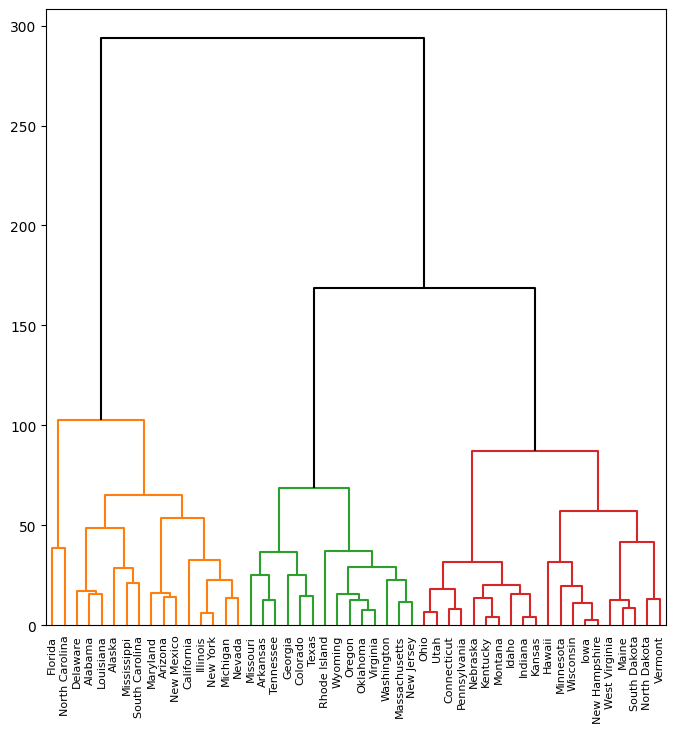

In [33]:
linkage_comp = compute_linkage(h_clust_complete)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           labels=X.index,
           color_threshold=130,
           above_threshold_color='black'
           );

In [9]:
cut_tree(linkage_comp, n_clusters=3).T

array([[0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1]])

In [13]:
cut_tree(linkage_comp, height=130).T

array([[0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1]])

In [95]:
clusters_df = pd.DataFrame(list(X.index), columns=['state'])
clusters_df['group_no'] = cut_tree(linkage_comp, height=130)
clusters_df.sort_values(by=['group_no','state'], inplace=True)
clusters_df.iloc[0:5,]

,state,group_no
0,Alabama,0
1,Alaska,0
2,Arizona,0
4,California,0
7,Delaware,0


**(c)** Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In [84]:
scaler = StandardScaler(with_std=True, with_mean=False)
X_scaled = scaler.fit_transform(X)

In [85]:
h_clust_complete_scaled = AgglomerativeClustering(metric='euclidean', distance_threshold=0, n_clusters=None, linkage='complete')
h_clust_complete_scaled.fit(X_scaled)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        metric='euclidean', n_clusters=None)

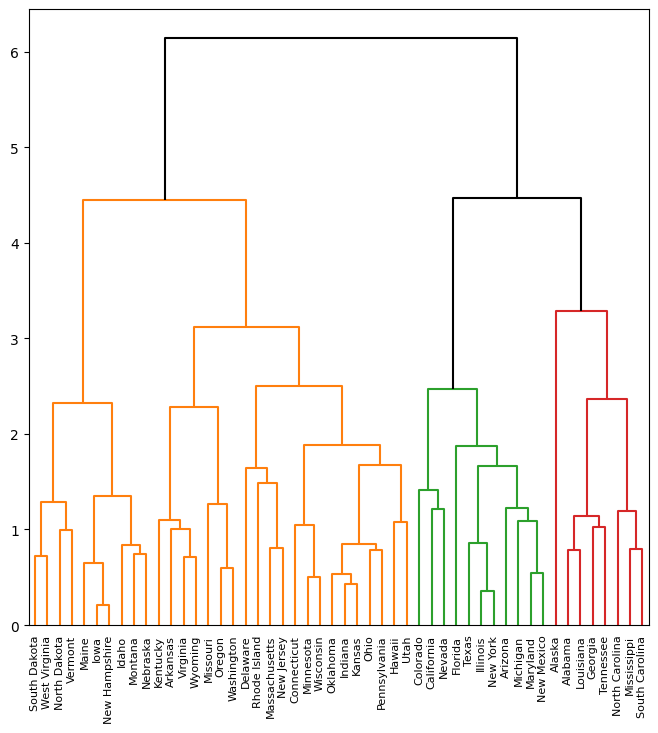

In [86]:
linkage_comp_scaled = compute_linkage(h_clust_complete_scaled)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scaled,
           ax=ax,
           labels=X.index,
           color_threshold=4.45,
           above_threshold_color='black'
           );

**(d)** What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

Scaling the variables to have a common standard deviation of one has the effect of resulting in one large group,a nd two smaller groups. The unscaled data resulted in three groups of roughly the same size.

We may want to scale the data before clustering if each varible is measured in an arbitrary unit, in which the measures in one variable may dominate the other variables in the clustering algorithm. In this case, `Murder`, `Assault`, and `Rape` are each measured on a per-capital basis (per 100,000 individuals), so these three variables are probablyl fairly comparible without scaling. However, `UrbanPop` is measured as a percentage, and is therefore not conceptually comparable with per-capita counts. The different measurement unit would make scaling more appropriate for these data.

## 10

In this problem, you will generate simulated data, and then perform PCA and $K$-means clustering on the data.

### Generate simulated data

**(a)** Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

Hint: There are a number of functions in Python that you can use to generate data. One example is the `normal()` method of the `random()` function in `numpy`; the `uniform()` method is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [31]:
rng = np.random.default_rng(1)
mat = rng.normal(loc=0, scale=2.0, size=(60,50))
mat = mat + np.concatenate(( np.ones((20,50)) * -2, np.ones((20,50)), np.ones((20,50)) * 2 ), axis=0)
# (20,50) +2 avg
# (20,50)
# (20,50) -2 avg

mat_labels = np.concatenate((np.zeros((20)), np.ones((20)), np.ones((20))*2))
mat_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

### PCA

**(b)** Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

In [32]:
scaler = StandardScaler(with_std=True, with_mean=True)
mat_scaled = scaler.fit_transform(mat)

In [33]:
pca_mat = PCA()
pca_mat.fit(mat_scaled)
scores = pca_mat.transform(mat_scaled)

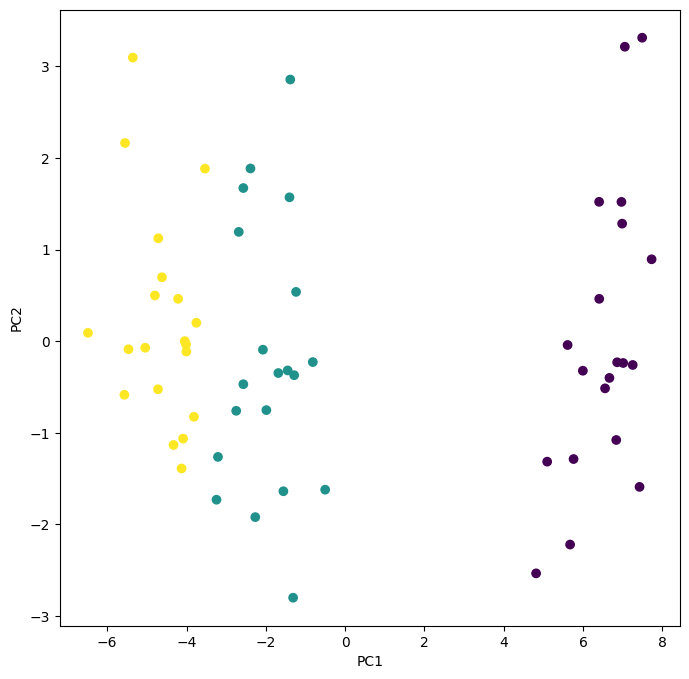

In [34]:
i, j = 0, 1 # (x, y) which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,i], scores[:,j], c=mat_labels)
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1));

### *K*-means Clustering

**(c)** Perform $K$-means clustering of the observations with $K = 3$. How well do the clusters that you obtained in $K$-means clustering compare to the true class labels?

Hint: You can use the `pd.crosstab()` function in Python to compare the true class labels to the class labels obtained by cluster- ing. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.